In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import PyQt5
import math
import scipy.integrate
import numpy as np
%matplotlib notebook
pd.options.mode.chained_assignment = None  # default='warn'

In [79]:


file_csv='/Users/pecce.victor/Desktop/prepa TIPE velo piezo/data_1667399308.csv'

# lire le fichier .csv dans la frame base
base=pd.read_csv(file_csv, sep=',', skipinitialspace=True, encoding="utf-8")  

#Changer les types des cellules en float
for field in base.columns:
    base[field] = base[field].astype(float)



print(base[0:100])

# passage des unités binaires processeurs aux unités physiques 
for i in base.index:
    base['Delta T (ms)'][i]= base['Delta T (ms)'][i]/1000000.0
    base['Time (s)'][i]= base['Time (s)'][i]/1000000.0
    base['Accel X (m/s^2)'][i]= (base['Accel X (m/s^2)'][i]-13130.0)*0.0202199
    base['Accel Y (m/s^2)'][i]= (base['Accel Y (m/s^2)'][i]-13130.0)*0.0202199
    base['Accel Z (m/s^2)'][i]= (base['Accel Z (m/s^2)'][i]-13130.0)*0.0202199
    base['Volt (V)'][i]= base['Volt (V)'][i]*0.000125
    
print(base[0:9])

az=base['Accel Z (m/s^2)']
taz=base['Time (s)']/1000











       Time (s)  Delta T (ms)  Accel X (m/s^2)  Accel Y (m/s^2)  \
0     2965269.0     2965269.0          13080.0          13480.0   
1     4628549.0     1663280.0          13078.0          13481.0   
2     6331776.0     1703227.0          13080.0          13471.0   
3     7920908.0     1589132.0          13080.0          13482.0   
4     9508687.0     1587779.0          13090.0          13484.0   
5    11096263.0     1587576.0          13078.0          13478.0   
6    12684728.0     1588465.0          13081.0          13477.0   
7    14269451.0     1584723.0          13082.0          13472.0   
8    15897862.0     1628411.0          13084.0          13483.0   
9    17483419.0     1585557.0          13084.0          13480.0   
10   19069438.0     1586019.0          13081.0          13476.0   
11   20650677.0     1581239.0          13080.0          13481.0   
12   22233769.0     1583092.0          13086.0          13482.0   
13   23814509.0     1580740.0          13083.0          13476.

<IPython.core.display.Javascript object>


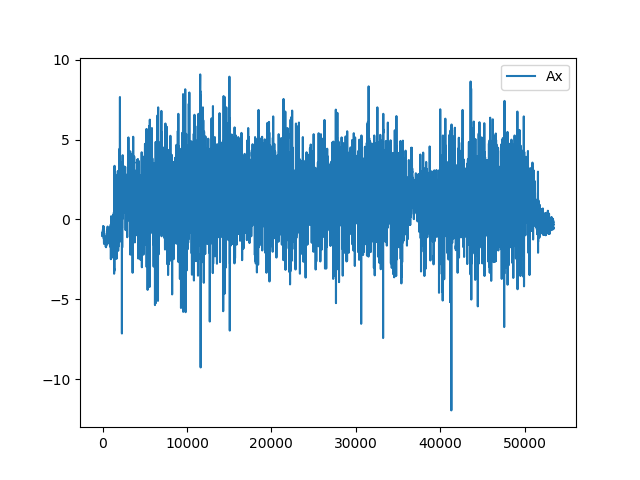

<IPython.core.display.Javascript object>


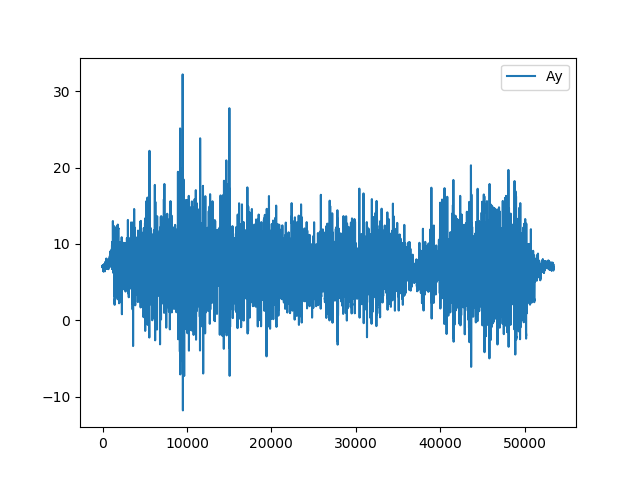

<IPython.core.display.Javascript object>


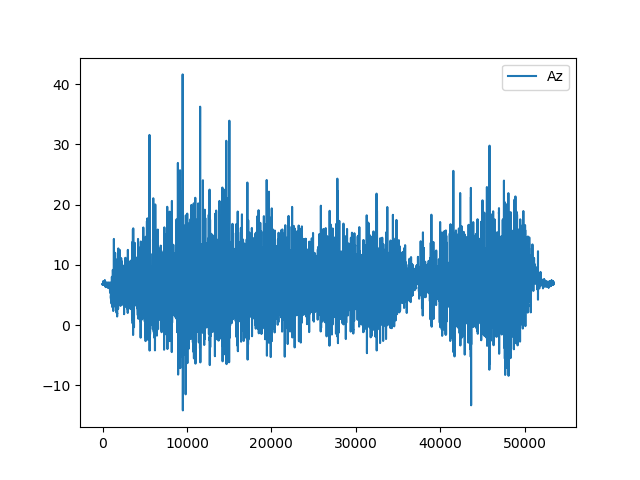

<IPython.core.display.Javascript object>


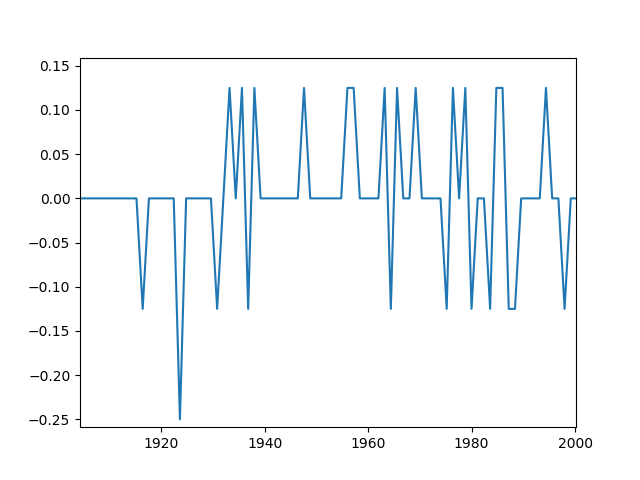

In [53]:
plt.figure(1)
plt.plot(base['Time (s)'], base['Accel X (m/s^2)'])
plt.legend(['Ax'])
plt.figure(2)
plt.plot(base['Time (s)'], base['Accel Y (m/s^2)'])
plt.legend(['Ay'])
plt.figure(3)
plt.plot(base['Time (s)'], base['Accel Z (m/s^2)'])
plt.legend(['Az'])

#plt.figure(3)
#plt.plot(base['Time (s)'], base['Accel X (m/s^2)'])
#plt.plot(base['Time (s)'], base['Accel Y (m/s^2)'])
#plt.plot(base['Time (s)'], base['Accel Z (m/s^2)'])
#plt.legend(['Ax', 'Ay', 'Az'])




plt.figure(4)
#plt.plot(base['Time (s)'], base['Accel X (m/s^2)'])
#plt.plot(base['Time (s)'], base['Accel Y (m/s^2)'])
#plt.plot(base['Time (s)'], base['Accel Z (m/s^2)'])
plt.plot(base['Time (s)'], base['Volt (V)']*1000)



In [91]:

m=5e-3
k=100
Q=10
mu=math.sqrt(m*k)/Q

def Fext(t):
#    if t>0:
#        return 1
#    else :
#        return 0

  return np.interp(t, taz, -m*az)

def func(t,gamma):
    return [gamma[1], 1/m*(Fext(t)-mu*gamma[1]-k*gamma[0])]

r = scipy.integrate.ode(func)
r.set_initial_value([0,0], 0)


t1 = 10
dt = 0.0001
x=[]
t=[]
while r.successful() and r.t < t1:
    gamma=r.integrate(r.t+dt)
    t=np.append(t,r.t+dt)
    x=np.append(x,gamma[0])
    

<IPython.core.display.Javascript object>


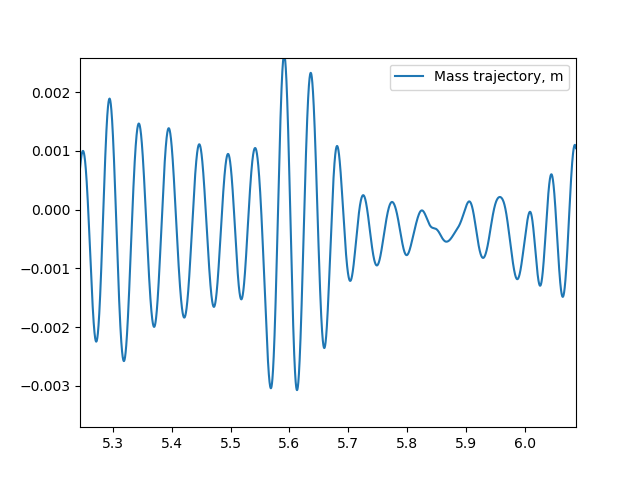

<IPython.core.display.Javascript object>


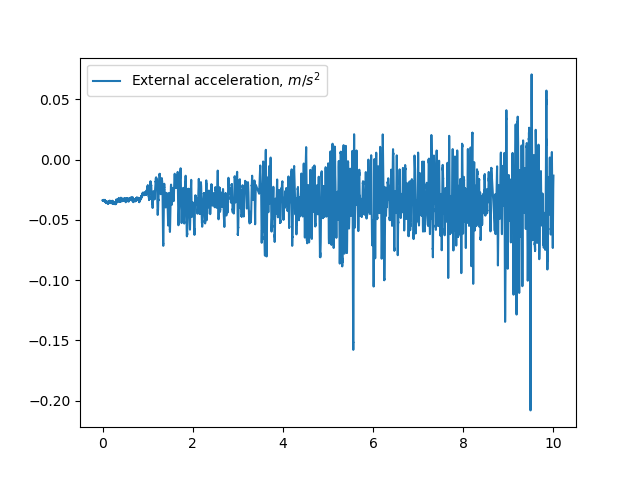

In [92]:
plt.figure()
plt.plot(t,x)
plt.legend(['Mass trajectory, m'])
plt.figure()
plt.plot(t, Fext(t))
plt.legend(['External acceleration, $m/s^2$'])

In [90]:
math.sqrt(k/m)/2/3.14

22.519324241609795